## Ejemplo con dataset conocido (Titanic)

In [13]:
import pandas as pd#importar libreria pandas
import seaborn as sns#importar libreria seaborn
df=sns.load_dataset('titanic')#cargar dataset titanic

In [14]:
df.head(10)#Muestra las primeras 10 filas

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


(1= sobrevive, 0 = no sobrevive).<br>
**Variable Objetivo**<br>
survived = Según las características de datos de entradas.<br>
--> y: Dependiente <br>
**Variable de entrada**<br>
-->x: Independiente -> Datos de entrada

-->Pclass: Clase de pasajero(primera,segunda,tercera)<br>
-->Name: Nombre del pasajero<br>
-->Sex: Sexo del pasajero<br>
-->Age: Edad del pasajero<br>
-->sibsp: Número de (hermanos o esposos) abordo<br>
-->parch: Padres y  niños abordo<br>
-->fare: Tarifa<br>
-->embarked:Puerto de embarque<br>
-->deck: plataforma<br>
-->embark_town: embarcar ciudad

In [15]:
df.replace({False: 0, True: 1}, inplace=True)#Reemplaza los valores falsos por 0 y los verdaderos por 1
df['adult_male'] = df['adult_male'].map({1: 'adult_male', 0: 'non-adult_male'})
df['alone'] = df['alone'].map({1: 'alone', 0: 'non-alone'})
df.loc[:, df.dtypes == 'object'] = df.select_dtypes(['object']).apply(lambda x: x.astype('category'))
#Elimina columnas que no se necesitan en el modelo de clasificación 
df= df.drop(columns=['survived', 'pclass', 'embarked'], errors='ignore')
df_one = pd.get_dummies(df["alive"], drop_first=True)
# Concatena las columnas de los dummies con las columnas originales 
df_two = pd.concat((df_one, df), axis=1)
# Elimina la columna alive 
df_two = df_two.drop(["alive"], axis=1)
# Renombra la columna alive por yes 
df = df_two.rename(columns={"yes": "alive"})
df.head()

,alive,sex,age,sibsp,parch,fare,class,who,adult_male,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,man,adult_male,NaN,Southampton,non-alone
1,1,female,38.0,1,0,71.2833,First,woman,non-adult_male,C,Cherbourg,non-alone
2,1,female,26.0,0,0,7.9250,Third,woman,non-adult_male,NaN,Southampton,alone
3,1,female,35.0,1,0,53.1000,First,woman,non-adult_male,C,Southampton,non-alone
4,0,male,35.0,0,0,8.0500,Third,man,adult_male,NaN,Southampton,alone


## Transformación Dataset de ejemplo

### Imputación missing value de age

Ahora se muestra los primeros 5 registros de los que no tenemos información de edad

In [29]:

display(df[df.age.isnull()].head())

,alive,sex,age,sibsp,parch,fare,class,who,adult_male,deck,embark_town,alone,age_miu,age_med,age_ah
5,0,male,NaN,0,0,8.4583,Third,man,adult_male,NaN,Queenstown,alone,29.699118,28.0,25.0
17,1,male,NaN,0,0,13.0000,Second,man,adult_male,NaN,Southampton,alone,29.699118,28.0,30.0
19,1,female,NaN,0,0,7.2250,Third,woman,non-adult_male,NaN,Cherbourg,alone,29.699118,28.0,21.5
26,0,male,NaN,0,0,7.2250,Third,man,adult_male,NaN,Cherbourg,alone,29.699118,28.0,25.0
28,1,female,NaN,0,0,7.8792,Third,woman,non-adult_male,NaN,Queenstown,alone,29.699118,28.0,21.5


Se devuelve el número de valores que faltan en el conjunto de datos.

In [17]:
df.isnull().sum()

alive            0
sex              0
age            177
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
deck           688
embark_town      2
alone            0
dtype: int64

Se hace uso de la blibiotema Sklearn  para el aprendizaje automático en Python. Proporciona una selección de herramientas eficientes para el aprendizaje automático y el modelado estadístico, incluida la clasificación, la regresión, la agrupación en clústeres y la reducción de la dimensionalidad a través de una interfaz de consistencia en Python.

In [18]:
# Age
#Crea un objeto de la clase SimpleImputer con la función de imputación media
import numpy as np 
#Importa SimpleImputer de sklearn para imputación de valores nulos en una columna de un dataframe
from sklearn.impute import SimpleImputer
# Importa KNNImputer de sklearn para imputación de valores nulos en una columna de un dataframe
from sklearn.impute import KNNImputer
#Importa enable_iterative_imputer de sklearn para imputación de valores nulos en una columna de un dataframe
from sklearn.experimental import enable_iterative_imputer
#Importa IterativeImputer de sklearn para imputación de valores nulos en una columna de un dataframe
from sklearn.impute import IterativeImputer
#Importa LinearRegression de sklearn para imputación de valores nulos en una columna de un dataframe 
from sklearn.linear_model import LinearRegression 

In [19]:
#Crea un objeto de tipo LinearRegression para imputación de valores nulos en una columna de un dataframe 
lr = LinearRegression()
#Crea un objeto de la clase SimpleImputer con la función de imputación media
im_mean=SimpleImputer(missing_values=np.nan, strategy='mean')
#Ajusta el objeto con los datos de la columna age 
im_mean=im_mean.fit(df[['age']])
#Transforma los datos de la columna age con el objeto creado anteriormente
df['age_miu'] = im_mean.transform(df[['age']])
df.head(10)#Muestra las primeras 10 filas

,alive,sex,age,sibsp,parch,fare,class,who,adult_male,deck,embark_town,alone,age_miu
0,0,male,22.0,1,0,7.2500,Third,man,adult_male,NaN,Southampton,non-alone,22.000000
1,1,female,38.0,1,0,71.2833,First,woman,non-adult_male,C,Cherbourg,non-alone,38.000000
2,1,female,26.0,0,0,7.9250,Third,woman,non-adult_male,NaN,Southampton,alone,26.000000
3,1,female,35.0,1,0,53.1000,First,woman,non-adult_male,C,Southampton,non-alone,35.000000
4,0,male,35.0,0,0,8.0500,Third,man,adult_male,NaN,Southampton,alone,35.000000
5,0,male,NaN,0,0,8.4583,Third,man,adult_male,NaN,Queenstown,alone,29.699118
6,0,male,54.0,0,0,51.8625,First,man,adult_male,E,Southampton,alone,54.000000
7,0,male,2.0,3,1,21.0750,Third,child,non-adult_male,NaN,Southampton,non-alone,2.000000
8,1,female,27.0,0,2,11.1333,Third,woman,non-adult_male,NaN,Southampton,non-alone,27.000000
9,1,female,14.0,1,0,30.0708,Second,child,non-adult_male,NaN,Cherbourg,non-alone,14.000000


In [20]:
im_median=SimpleImputer(missing_values=np.nan, strategy='median')
im_median=im_median.fit(df[['age']])
df['age_med'] = im_median.transform(df[['age']])
df.head(10)#Muestra las primeras 10 filas

,alive,sex,age,sibsp,parch,fare,class,who,adult_male,deck,embark_town,alone,age_miu,age_med
0,0,male,22.0,1,0,7.2500,Third,man,adult_male,NaN,Southampton,non-alone,22.000000,22.0
1,1,female,38.0,1,0,71.2833,First,woman,non-adult_male,C,Cherbourg,non-alone,38.000000,38.0
2,1,female,26.0,0,0,7.9250,Third,woman,non-adult_male,NaN,Southampton,alone,26.000000,26.0
3,1,female,35.0,1,0,53.1000,First,woman,non-adult_male,C,Southampton,non-alone,35.000000,35.0
4,0,male,35.0,0,0,8.0500,Third,man,adult_male,NaN,Southampton,alone,35.000000,35.0
5,0,male,NaN,0,0,8.4583,Third,man,adult_male,NaN,Queenstown,alone,29.699118,28.0
6,0,male,54.0,0,0,51.8625,First,man,adult_male,E,Southampton,alone,54.000000,54.0
7,0,male,2.0,3,1,21.0750,Third,child,non-adult_male,NaN,Southampton,non-alone,2.000000,2.0
8,1,female,27.0,0,2,11.1333,Third,woman,non-adult_male,NaN,Southampton,non-alone,27.000000,27.0
9,1,female,14.0,1,0,30.0708,Second,child,non-adult_male,NaN,Cherbourg,non-alone,14.000000,14.0


Se tiene el resultado del valor espeficado que fue la edad. Asi pues, los nuevos campos creados pertecen a la media, mediada y moda de la edad. 

In [22]:
iter_imputer = IterativeImputer(estimator=lr,missing_values=np.nan, 
                                max_iter=10,random_state=0)#Crea un objeto de la clase IterativeImputer con la función de imputación iterativa
#otros estimadores: BayesianRidge o ExtraTreeRegressor
#Ajusta el objeto con los datos de la columna age 
iter_imputer= iter_imputer.fit(df[['age']])
#Transforma los datos de la columna age con el objeto creado anteriormente 
df['age_mice']=iter_imputer.transform(df[['age']])

#Crea un objeto de la clase KNNImputer con la función de imputación KNN
knn_imputer = KNNImputer(n_neighbors=4, weights="uniform")
#Ajusta el objeto con los datos de la columna age 
knn_imputer  = knn_imputer.fit(df[['age']])
#Transforma los datos de la columna age con el objeto creado anteriormente
df['age_knn']=knn_imputer.transform(df[['age']])

###imputer ad-hoc
df['age_ah'] = df['age'].groupby([df['class'], df['sex']]).apply(lambda x: x.fillna(x.median()))
display(df[df.age.isnull()].head())

,alive,sex,age,sibsp,parch,fare,class,who,adult_male,deck,embark_town,alone,age_miu,age_med,age_mice,age_knn,age_ah
5,0,male,NaN,0,0,8.4583,Third,man,adult_male,NaN,Queenstown,alone,29.699118,28.0,29.699118,29.699118,25.0
17,1,male,NaN,0,0,13.0000,Second,man,adult_male,NaN,Southampton,alone,29.699118,28.0,29.699118,29.699118,30.0
19,1,female,NaN,0,0,7.2250,Third,woman,non-adult_male,NaN,Cherbourg,alone,29.699118,28.0,29.699118,29.699118,21.5
26,0,male,NaN,0,0,7.2250,Third,man,adult_male,NaN,Cherbourg,alone,29.699118,28.0,29.699118,29.699118,25.0
28,1,female,NaN,0,0,7.8792,Third,woman,non-adult_male,NaN,Queenstown,alone,29.699118,28.0,29.699118,29.699118,21.5


<AxesSubplot:>

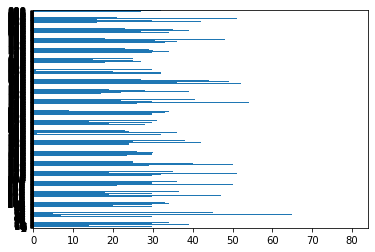

In [32]:
df['age_miu'].plot.barh(stacked=True)

In [23]:
df['age_ah'].isnull().sum()#devuelve el número de valores que faltan en el conjunto de datos.

0

In [24]:
#Podemos decidir extraer las variables similares
 #Elimina columnas que no se necesitan en el modelo de clasificación
df= df.drop(columns=['age_knn', 'age_mice'], errors='ignore')

### Imputación missing value de  embark_town

In [25]:
#embark_town
#df.dropna(subset=['embark_town'],how='any',inplace=True)# eliminar faltantes
imputer_mf = SimpleImputer(strategy='most_frequent', missing_values=np.nan)
#Ajusta el objeto con los datos de la columna embark_town 
imputer_mf= imputer_mf.fit(df[['embark_town']])
#Transforma los datos de la columna embark_town con el objeto creado anteriormente
df['embark_town']=imputer_mf.transform(df[['embark_town']])
df['embark_town'].isnull().sum()

0

### Tratamiento de outliers: Age, Fare

In [28]:
#remover outliers al usar Z y IQR.
# imputar with IQR, z y percentiles

    #Función para eliminar outliers con IQR  
def remove_outlier_IQR(df_in, col_name):
    #Calcula el cuantil 0.25 de la columna col_name
    q1 = df_in[col_name].quantile(0.25)
    #Calcula el cuantil 0.75 de la columna col_name
    q3 = df_in[col_name].quantile(0.75)
     #Interquartile range
    iqr = q3-q1
    #Calcula el valor inferior del intervalo de confianza
    lower  = q1-1.5*iqr
    #Calcula el valor superior del intervalo de confianza
    upper = q3+1.5*iqr
    #Filtra los datos de la columna col_name que estén entre los valores inferiores y superiores del intervalo de confianza
    df_out = df_in.loc[(df_in[col_name] > lower) & (df_in[col_name] < upper)]
    #Devuelve los datos filtrados
    return df_out

    #Función para eliminar outliers con Z
def remove_outlier_z(df_in,colname,standard_deviations):
    #Filtra los datos de la columna col_name que estén entre los valores inferiores y superiores del intervalo de confianza
    df_out =df_in[((df_in[colname] - df_in[colname].mean()) / df_in[colname].std()).abs() < standard_deviations]
    return df_out

    #Función para eliminar outliers con percentiles
def remove_outlier_perc(df_in, col_name, q):
    #Calcula el cuantil 1-q de la columna col_name
    upper = df_in[col_name].quantile(1-q)
    #Calcula el cuantil q de la columna col_name
    lower = df_in[col_name].quantile(q)
    #  Filtra los datos de la columna col_name que estén entre los valores inferiores y superiores del intervalo de confianza
    df_out = df_in.loc[(df_in[col_name] > lower) & (df_in[col_name] < upper)]
    return df_out

#Elimina los outliers con IQR y devuelve el número de filas eliminadas
a=remove_outlier_IQR(df, 'age').shape 
#Elimina los outliers con Z y 3 desviaciones estándar
b=remove_outlier_z(df,'age',3).shape 
# Elimina los outliers con percentiles 0.05
c=remove_outlier_perc(df, 'age', 0.05).shape 
# Imprime el número de filas eliminadas por cada método de eliminación de outliers
print(a,b,c)

(703, 15) (712, 15) (635, 15)


In [35]:
# Categorizar, discretizar o Binning de Age, Fare
# Hay diversas formas de hacer binning. Usaremos la función qcut() que genera intervalos por quantiles.
import pandas as pd
df['age_qbin'] = pd.qcut(df['age_ah'], q=10, precision=0)
df['fare_qbin'] = pd.qcut(df['fare'], q=10, precision=2)
df.head()

188